### Load Dataset (Omega)
Load the dataset into a pandas DataFrame for further analysis. This dataset contains information about forum posts from Watchuseek under the Omega sub-forum


In [1]:
import pandas as pd

# Load the dataset
omega_data = pd.read_csv('./omega.csv')

# Display the first few rows of the dataset to understand its structure
omega_data.head()


,comments,omega
0,reference 2531 80 ask service history thanks,1
1,little know reference think inclined reissue s...,1
2,love railmaster,1
3,seven watch need seven watch first make one wa...,1
4,go omega tudor hour hand also though say dated...,1


### Initial Data Exploration (Omega)
View the first few entries in the dataset, check for missing values, and understand the dataset's basic statistical properties.


In [2]:
# Check for the distribution of the 'omega' column
omega_distribution = omega_data['omega'].value_counts(normalize=True)

# Check for missing values
missing_values = omega_data.isnull().sum()

# Basic dataset statistics
num_entries = len(omega_data)
num_features = omega_data.shape[1]

omega_distribution, missing_values, num_entries, num_features


(omega
 1    1.0
 Name: proportion, dtype: float64,
 comments    0
 omega       0
 dtype: int64,
 15000,
 2)

There are no missing values in the dataset, which simplifies the preprocessing step since we won't need to handle missing data.
The dataset contains 15,000 entries.

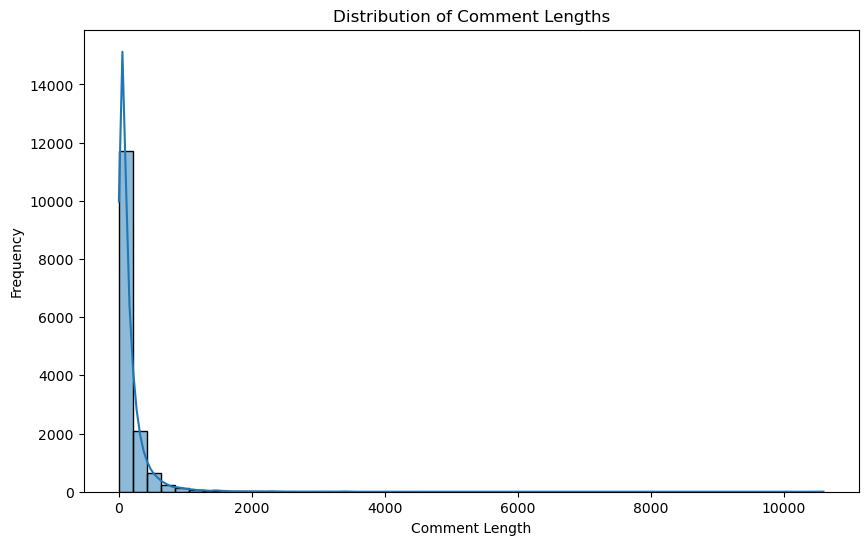

count    15000.0000
mean       163.8918
std        275.5748
min          1.0000
25%         37.0000
50%         85.0000
75%        190.0000
max      10591.0000
Name: comment_length, dtype: float64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each comment
omega_data['comment_length'] = omega_data['comments'].apply(len)

# Plot the distribution of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(omega_data['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for comment length
comment_length_stats = omega_data['comment_length'].describe()
comment_length_stats


We can see most posts have a mean of 163.8918 words and median of 85 words.

### Data Cleaning and Pre-processing (Omega)

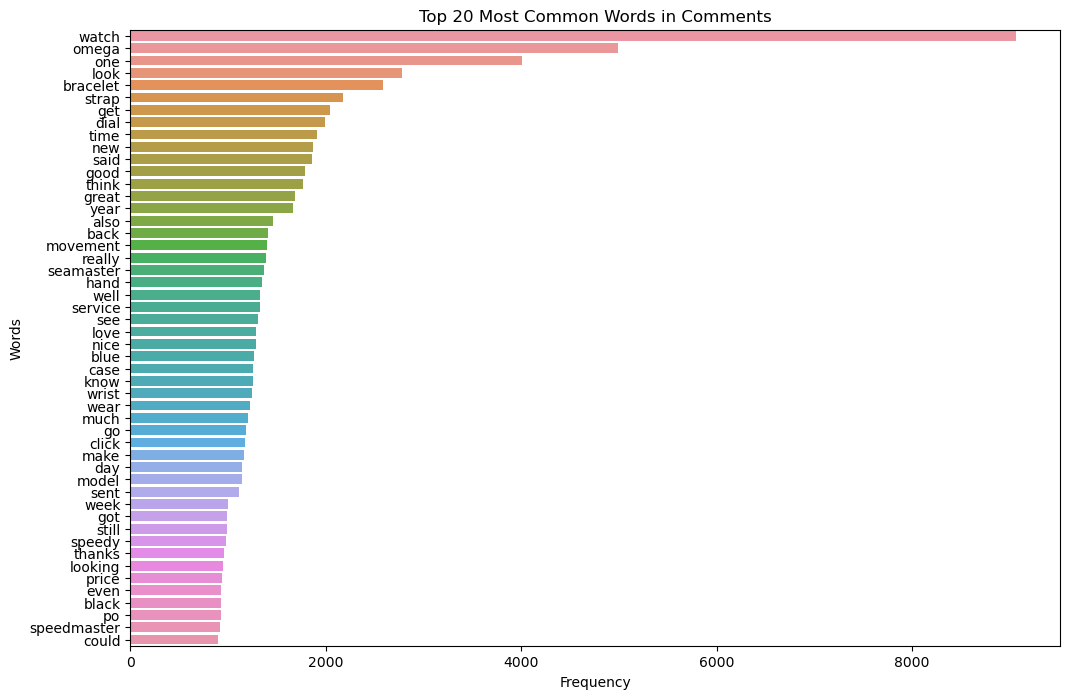

[('watch', 9063),
 ('omega', 4988),
 ('one', 4009),
 ('look', 2782),
 ('bracelet', 2586),
 ('strap', 2179),
 ('get', 2047),
 ('dial', 1996),
 ('time', 1912),
 ('new', 1869),
 ('said', 1857),
 ('good', 1785),
 ('think', 1766),
 ('great', 1687),
 ('year', 1667),
 ('also', 1459),
 ('back', 1410),
 ('movement', 1405),
 ('really', 1392),
 ('seamaster', 1371),
 ('hand', 1346),
 ('well', 1328),
 ('service', 1325),
 ('see', 1307),
 ('love', 1288),
 ('nice', 1286),
 ('blue', 1272),
 ('case', 1261),
 ('know', 1258),
 ('wrist', 1249),
 ('wear', 1222),
 ('much', 1201),
 ('go', 1187),
 ('click', 1178),
 ('make', 1168),
 ('day', 1145),
 ('model', 1142),
 ('sent', 1114),
 ('week', 999),
 ('got', 991),
 ('still', 986),
 ('speedy', 981),
 ('thanks', 959),
 ('looking', 946),
 ('price', 940),
 ('even', 933),
 ('black', 927),
 ('po', 926),
 ('speedmaster', 924),
 ('could', 897)]

In [15]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_and_tokenize(text):
    tokens = re.findall(r'\w+', text.lower())  # Convert to lower case and split into words
    return tokens

# Apply the function to each comment and count word frequencies
omega_data['tokens'] = omega_data['comments'].apply(clean_and_tokenize)
all_words = [word for tokens in omega_data['tokens'] for word in tokens]
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(50)

# Plot the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words])
plt.title('Top 20 Most Common Words in Comments')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

most_common_words


Top 10 1-grams not Omega-centric

### Data visualisation for 1-gram (Omega)

/var/folders/x6/zx_rj6pn4cn9y8cz4ksk65vw0000gn/T/ipykernel_3751/2231489643.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


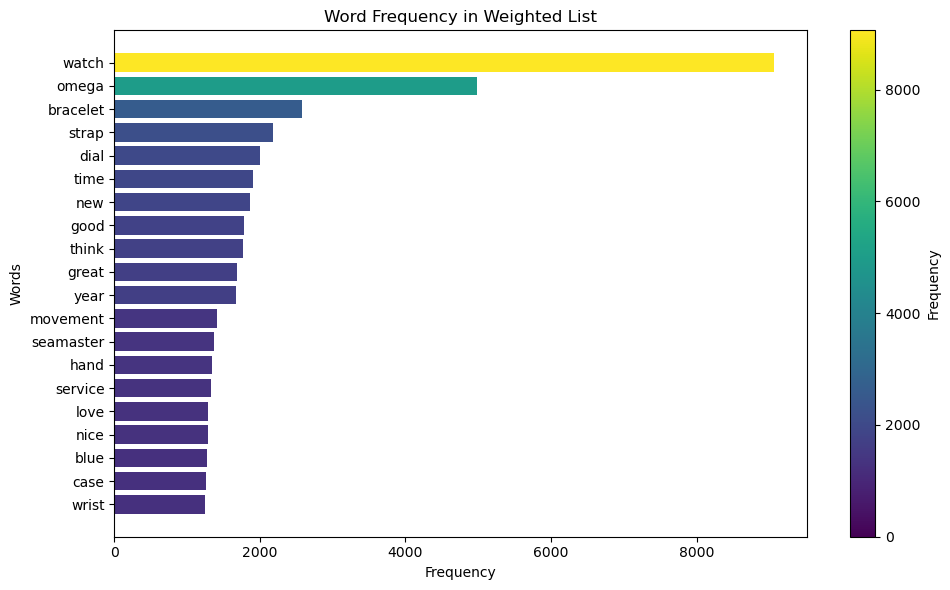

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = [('watch', 9063), ('omega', 4988), ('bracelet', 2586), ('strap', 2179), ('dial', 1996), ('time', 1912),
        ('new', 1869), ('good', 1785), ('think', 1766), ('great', 1687), ('year', 1667), ('movement', 1405),
        ('seamaster', 1371), ('hand', 1346), ('service', 1325), ('love', 1288), ('nice', 1286), ('blue', 1272),
        ('case', 1261), ('wrist', 1249)]

# Extract labels and values
labels = [item[0] for item in data]
values = [item[1] for item in data]

# Normalise values
normalized_values = np.array(values) / max(values)

# Define colormap
colormap = plt.cm.viridis

# Create bar chart with gradient colours
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=colormap(normalized_values))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequency in Weighted List')
plt.gca().invert_yaxis()  # Invert y-axis to display words from top to bottom
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add color bar legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(0, max(values)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency')

plt.show()


Same information in different colour

### Load Dataset (Cartier)
Load the dataset into a pandas DataFrame for further analysis. This dataset contains information about forum posts from Watchuseek under the Cartier sub-forum


In [5]:
# Load the new dataset
cartier_data_path = './cartier.csv'
cartier_data = pd.read_csv(cartier_data_path)

# Display the first few rows of the dataset
cartier_data.head()


,comments,omega
0,proud honored introduce new cartier forum stro...,0
1,glad opened forum,0
2,yay glad see powerhouse getting subforum reall...,0
3,step 1 cartier forum step 2 cartier wrist step...,0
4,thanks joined forum getting first real watch r...,0


### Data visualisation for 1-gram (Cartier)

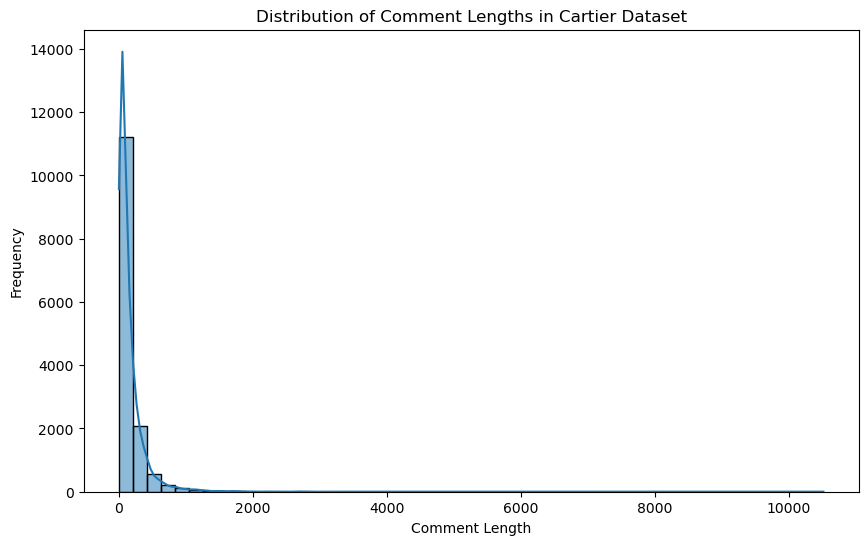

count    14328.000000
mean       159.592546
std        287.845910
min          1.000000
25%         36.000000
50%         85.000000
75%        187.000000
max      10520.000000
Name: comment_length, dtype: float64

In [6]:
# Calculate the length of each comment in the Cartier dataset
cartier_data['comment_length'] = cartier_data['comments'].apply(len)

# Plot the distribution of comment lengths for the Cartier dataset
plt.figure(figsize=(10, 6))
sns.histplot(cartier_data['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths in Cartier Dataset')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for comment length in the Cartier dataset
cartier_comment_length_stats = cartier_data['comment_length'].describe()
cartier_comment_length_stats


We can see most posts have a mean of 159.5925 words and median of 85 words which is similar to Omega dataset.

### Data visualisation for 1-gram (Cartier)

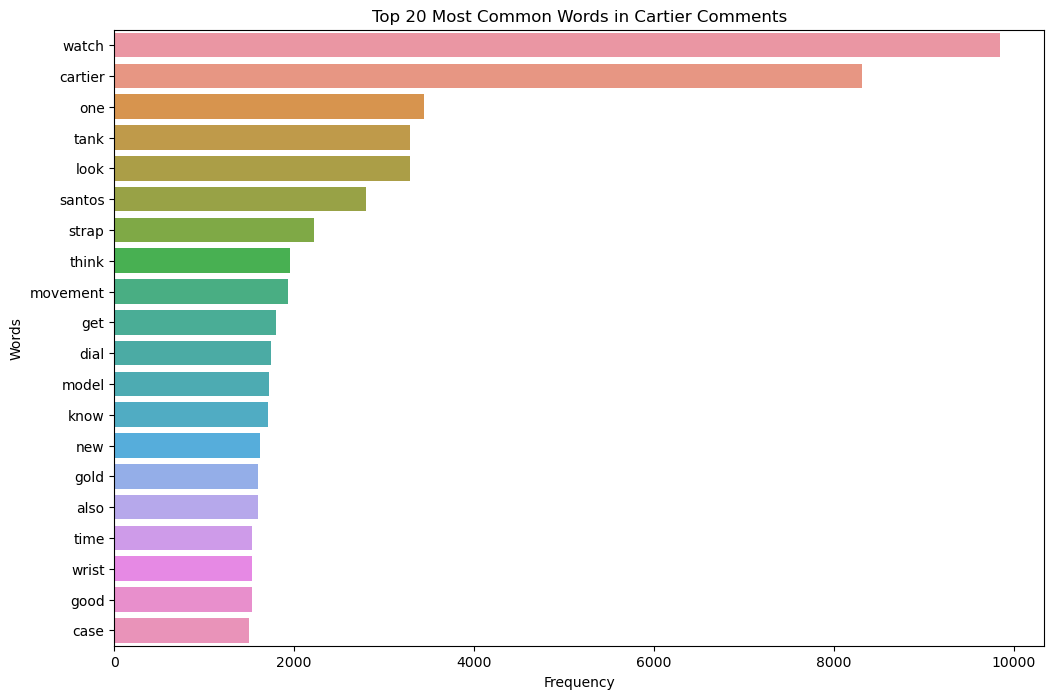

[('watch', 9843),
 ('cartier', 8308),
 ('one', 3440),
 ('tank', 3289),
 ('look', 3288),
 ('santos', 2802),
 ('strap', 2214),
 ('think', 1951),
 ('movement', 1936),
 ('get', 1799),
 ('dial', 1743),
 ('model', 1722),
 ('know', 1711),
 ('new', 1623),
 ('gold', 1602),
 ('also', 1601),
 ('time', 1532),
 ('wrist', 1531),
 ('good', 1527),
 ('case', 1501)]

In [7]:
# Apply the clean and tokenize function to each comment in the Cartier dataset
cartier_data['tokens'] = cartier_data['comments'].apply(clean_and_tokenize)
all_cartier_words = [word for tokens in cartier_data['tokens'] for word in tokens]
cartier_word_counts = Counter(all_cartier_words)

# Most common words in the Cartier dataset
most_common_cartier_words = cartier_word_counts.most_common(20)

# Plot the most common words in the Cartier dataset
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for word, count in most_common_cartier_words], y=[word for word, count in most_common_cartier_words])
plt.title('Top 20 Most Common Words in Cartier Comments')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

most_common_cartier_words


We observe that the top 10 1-grams are very Cartier-centric.

### Data visualisation for trigram (Omega)
From list as original code on entire dataset has to run in Google Colab else will crash on normal hardware.

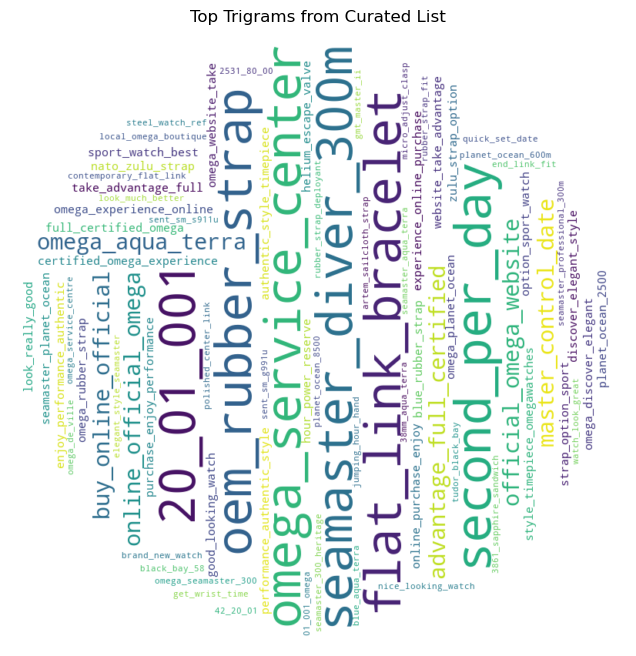

In [8]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

# Curated list of trigrams
curated_trigrams = [
 'seamaster diver 300m',
 'oem rubber strap',
 'omega service center',
 'second per day',
 'flat link bracelet',
 '20 01 001',
 'omega aqua terra',
 'master control date',
 'official omega website',
 'online official omega',
 'advantage full certified',
 'buy online official',
 'certified omega experience',
 'discover elegant style',
 'enjoy performance authentic',
 'experience online purchase',
 'full certified omega',
 'omega discover elegant',
 'omega experience online',
 'omega website take',
 'online purchase enjoy',
 'purchase enjoy performance',
 'take advantage full',
 'website take advantage',
 'good looking watch',
 'look really good',
 'nato zulu strap',
 'omega planet ocean',
 'omega rubber strap',
 'option sport watch',
 'performance authentic style',
 'seamaster planet ocean',
 'sport watch best',
 'strap option sport',
 'zulu strap option',
 'authentic style timepiece',
 'style timepiece omegawatches',
 'hour power reserve',
 'blue rubber strap',
 'helium escape valve',
 'planet ocean 2500',
 'contemporary flat link',
 'local omega boutique',
 'look much better',
 'omega seamaster 300',
 'seamaster 300 heritage',
 'seamaster aqua terra',
 'tudor black bay',
 '38mm aqua terra',
 'brand new watch',
 'elegant style seamaster',
 'micro adjust clasp',
 'artem sailcloth strap',
 'get wrist time',
 'nice looking watch',
 'planet ocean 600m',
 'planet ocean 8500',
 'rubber strap deployant',
 'seamaster professional 300m',
 'steel watch ref',
 '2531 80 00',
 '42 20 01',
 'blue aqua terra',
 'end link fit',
 'gmt master ii',
 'omega de ville',
 'polished center link',
 'quick set date',
 'watch look great',
 '3861 sapphire sandwich',
 'black bay 58',
 'jumping hour hand',
 'omega service centre',
 'rubber strap fit',
 'sent sm g991u',
 'sent sm s911u',
 '01 001 omega']

# Adjust the approach to generate the word cloud
trigrams_for_wordcloud_adjusted = " ".join(["_".join(trigram.split()) for trigram in curated_trigrams])

# Create a circular mask
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)

# Generate wordcloud
wordcloud_adjusted = WordCloud(width=800, height=400, 
                      background_color='white', collocations=False, prefer_horizontal=0.5, mask=mask).generate(trigrams_for_wordcloud_adjusted)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_adjusted, interpolation='bilinear')
plt.title('Top Trigrams from Curated List')
plt.axis('off')
plt.show()


Top trigrams are not Omega-centric other than seamaster and service centre.

### Import dataset 

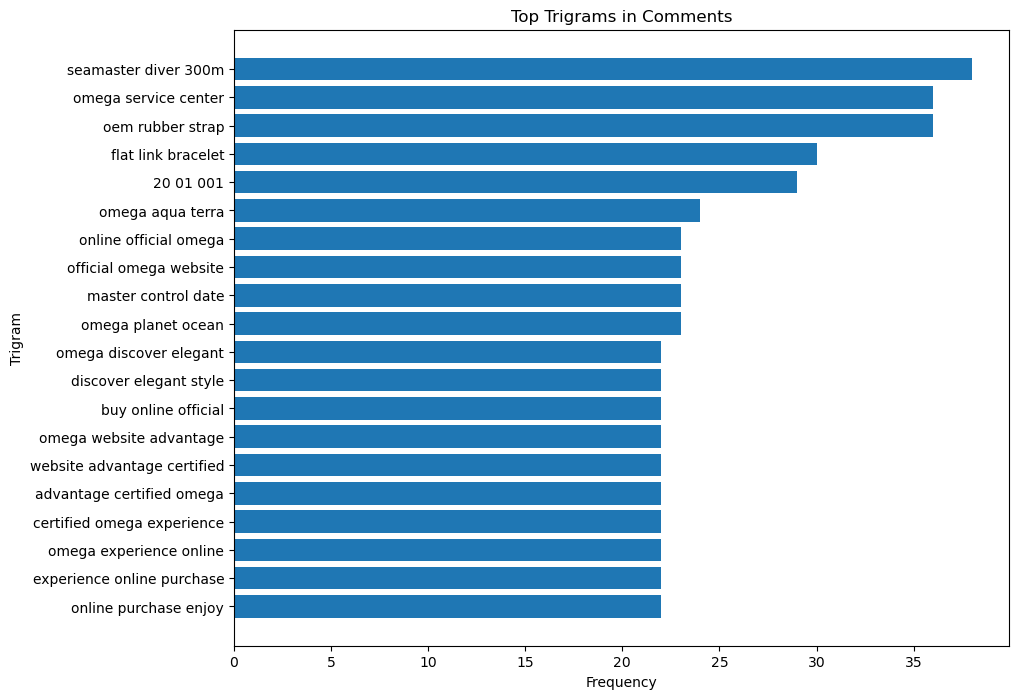

In [12]:
import matplotlib.pyplot as plt

# List of curated trigrams and their frequencies
curated_trigrams = [
 ('seamaster diver 300m', 38),
 ('omega service center', 36),
 ('oem rubber strap', 36),
 ('flat link bracelet', 30),
 ('20 01 001', 29),
 ('omega aqua terra', 24),
 ('online official omega', 23),
 ('official omega website', 23),
 ('master control date', 23),
 ('omega planet ocean', 23),
 ('omega discover elegant', 22),
 ('discover elegant style', 22),
 ('buy online official', 22),
 ('omega website advantage', 22),
 ('website advantage certified', 22),
 ('advantage certified omega', 22),
 ('certified omega experience', 22),
 ('omega experience online', 22),
 ('experience online purchase', 22),
 ('online purchase enjoy', 22),]


# Separate the trigrams and their frequencies for plotting
trigrams = [item[0] for item in curated_trigrams]
frequencies = [item[1] for item in curated_trigrams]

# Create a bar graph
plt.figure(figsize=(10, 8))
plt.barh(trigrams, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top Trigrams in Comments')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()


Same information but presented in different visualisation

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Initialize a CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')

# Apply the vectorizer to the 'comments' column
X = vectorizer.fit_transform(data['comments'])

# Sum up the counts of each trigram
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of trigrams by frequency in descending order
words_freq_sorted = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Get the top 100 trigrams
top_100_trigrams = words_freq_sorted[:100]

top_100_trigrams


[('tank solo xl', 107),
 ('tank solo large', 82),
 ('cartier tank solo', 77),
 ('tank louis cartier', 76),
 ('wear good health', 64),
 ('cartier stepped tank', 45),
 ('cartier tank watch', 44),
 ('cartier santos 100', 35),
 ('cartier santos galbee', 34),
 ('cartier tank louis', 34),
 ('vintage cartier tank', 33),
 ('cartier ballon bleu', 31),
 ('santos 100 xl', 30),
 ('great looking watch', 29),
 ('stepped tank jumbo', 27),
 ('18k yellow gold', 26),
 ('manual wind movement', 26),
 ('cartier tank francaise', 25),
 ('think look great', 24),
 ('cartier santos dumont', 24),
 ('look great wrist', 23),
 ('sent ipad pro', 22),
 ('high end watch', 22),
 ('best regard nuno', 21),
 ('reference guide 1970s', 20),
 ('looking reference guide', 19),
 ('cartier service center', 19),
 ('local cartier boutique', 19),
 ('new cartier santos', 19),
 ('pre owned watch', 19),
 ('watch look great', 18),
 ('stainless steel bracelet', 18),
 ('sent sm g996u', 18),
 ('pre owned cartier', 18),
 ('fake thread clos

### Data visualisation for trigram (Cartier)

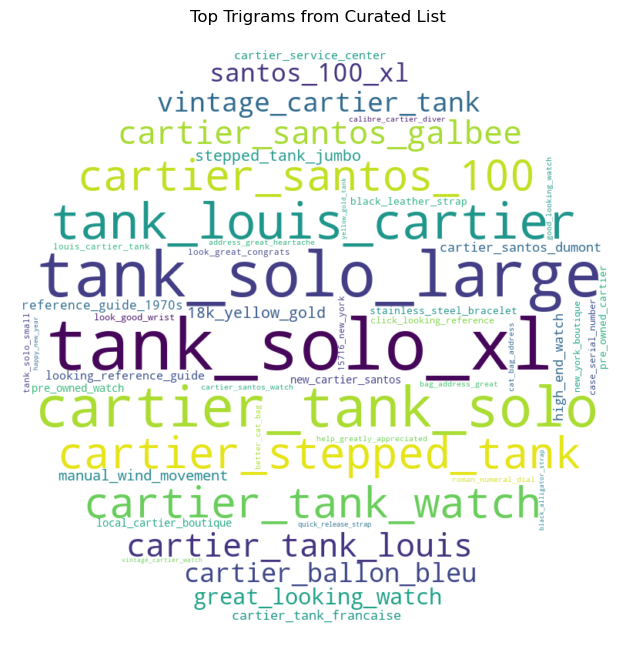

In [30]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

# Curated list of trigrams
curated_trigrams = ['tank solo xl', 'tank solo large', 'cartier tank solo', 'tank louis cartier', 'cartier stepped tank', 'cartier tank watch', 'cartier santos 100', 'cartier santos galbee', 'cartier tank louis', 'vintage cartier tank', 'cartier ballon bleu', 'santos 100 xl', 'great looking watch', 'stepped tank jumbo', '18k yellow gold', 'manual wind movement', 'cartier tank francaise', 'cartier santos dumont', 'high end watch', 'reference guide 1970s', 'looking reference guide', 'cartier service center', 'local cartier boutique', 'new cartier santos', 'pre owned watch', 'stainless steel bracelet', 'pre owned cartier', 'black leather strap', 'click looking reference', 'new york boutique', 'case serial number', 'look good wrist', 'louis cartier tank', 'look great congrats', 'tank solo small', '15716 new york', 'calibre cartier diver', 'better cat bag', 'cat bag address', 'bag address great', 'address great heartache', 'good looking watch', 'cartier santos watch', 'roman numeral dial', 'help greatly appreciated', 'quick release strap', 'vintage cartier watch', 'black alligator strap', 'yellow gold tank', 'happy new year']

# Adjust the approach to generate the word cloud
trigrams_for_wordcloud_adjusted = " ".join(["_".join(trigram.split()) for trigram in curated_trigrams])

# Create a circular mask
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)

# Generate wordcloud
wordcloud_adjusted = WordCloud(width=800, height=400, 
                      background_color='white', collocations=False, prefer_horizontal=0.5, mask=mask).generate(trigrams_for_wordcloud_adjusted)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_adjusted, interpolation='bilinear')
plt.title('Top Trigrams from Curated List')
plt.axis('off')
plt.show()


We observe that top trigrams for Cartier are highly Cartier-centric